In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 

%matplotlib inline

In [2]:
# Confusion Matrix plotting function definition
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    if not title:
        title = 'Confusion matrix for best model'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    #return ax

    fig2 = plt.figure(figsize=(10, 2))
    ax2 = plt.subplot(111)
    ax2.axis('off')

    colLabels1 = ['Metrics','Values']
    cellText1 = [['Accuracy', round((cm[0,0] + cm[1,1])/sum(cm[0]+cm[1]),4)],
            ['Recall',round(((cm[0,0])/sum(cm[0])),4)],
            ['Precision',round((cm[0,0]/(cm[0,0]+cm[1,0])),4)]]
    colColours1 = ['#56b5fd','lightgray']
    rowColours1 = [['lightgray','w'],['lightgray','w'],['lightgray','w']]
    tab = ax2.table(cellText=cellText1, colLabels=colLabels1, bbox=[0, 0, 1, 1], cellLoc = 'center', cellColours=rowColours1, colColours=colColours1)
    #tab = ax2.table(cellText=cellText1, bbox=[0, 0, 1, 1], cellLoc = 'center', cellColours=rowColours1, colColours=colColours1)
    tab.auto_set_font_size(False)
    tab.set_fontsize(14)
    return ax,ax2

In [3]:
df1 = pd.read_csv("sgemm_product.csv")
df1.describe()
df1['y']=(df1['Run1 (ms)']+df1['Run2 (ms)']+df1['Run3 (ms)']+df1['Run4 (ms)'])/4

#print(df['y'])
# remove extra fields in data set
df1.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis=1, inplace=True)

target_col = ['y']
matrix_col = ['MWG','NWG']
dimn_col = ['KWG']
wkgsize_col = ['MDIMC','NDIMC']
memshape_col = ['MDIMA','NDIMB']
kloop_col = ['KWI']
vecwidth_col = ['VWM','VWN']
enstride_col = ['STRM','STRN']
cach_col = ['SA','SB']

dep_var = target_col
indep_var = matrix_col + dimn_col+wkgsize_col+memshape_col+kloop_col+vecwidth_col+enstride_col+cach_col
df1.describe()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.571953
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,368.750161
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.667500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.387500
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3341.507500


In [4]:
# remove outliers

df1 = df1[~(np.abs(df1['y']-df1['y'].mean()) > (3*df1['y'].std()))]#count= 5251 = 2.17% of data
df1.describe()


#236349 rows 

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
count,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000,236349.000000
mean,79.571278,79.554489,25.432289,14.067773,14.067773,17.374374,17.372648,4.997195,2.429885,2.431379,0.499985,0.499774,0.492564,0.493021,175.549277
std,42.418510,42.412004,7.870757,7.910227,7.910227,9.386976,9.385887,3.000005,1.937508,1.940032,0.500001,0.500001,0.499946,0.499952,229.639526
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.342500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,67.952500
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,213.060000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1323.620000


In [5]:
df1 = df1.sample(n=100000, random_state=1111)
df1.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,79.436320,79.468480,25.436480,14.059920,14.086800,17.367760,17.370320,4.995380,2.429520,2.430280,0.502230,0.497040,0.494410,0.493190,174.909874
std,42.401265,42.366255,7.870016,7.906124,7.927944,9.374665,9.389572,3.000011,1.940039,1.942565,0.499998,0.499994,0.499971,0.499956,228.826778
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.420000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.312500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,67.830000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,211.453125
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1323.620000


**Dataset 1 - Pre-processing**

In [6]:

print(round(df1['y'].mean(),3))
#type(target_col)
#print(mean(target_col ))


174.91


In [7]:
target_col = 'y'
for i in range(len(df1)):
    if(df1['y'].values[i] <= 174.91):
        df1['y'].values[i] = 0
    else:
        df1['y'].values[i] = 1
df2 = df1.copy(deep=True)
df1.describe()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,79.436320,79.468480,25.436480,14.059920,14.086800,17.367760,17.370320,4.995380,2.429520,2.430280,0.502230,0.497040,0.494410,0.493190,0.293500
std,42.401265,42.366255,7.870016,7.906124,7.927944,9.374665,9.389572,3.000011,1.940039,1.942565,0.499998,0.499994,0.499971,0.499956,0.455368
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
## Dataset 1 
##Feature scaling - Mean normalization
for col in df1.columns:
    if(col != 'y'):
        df1[col] = (df1[col] - df1[col].mean())/df1[col].std()

target_col = 'y'        
from sklearn.model_selection import train_test_split
svm_train, svm_test = train_test_split(df1, test_size = 0.3, random_state = 40)

svm_train_y = svm_train[target_col]
svm_train_x = svm_train.loc[:, svm_train.columns!=target_col]

svm_test_y = svm_test[target_col]
svm_test_x = svm_test.loc[:, svm_test.columns!=target_col]

**Audit data pre processing**

In [9]:
## Dataset 2 - Audit dataset
audit_data = pd.read_csv('trial.csv')
audit_data.drop(['LOCATION_ID','TOTAL','Score'], axis = 1, inplace = True) ##Dropping ID; Dropping TOTAL column as it is redundant
audit_data['Money_Value'].fillna((audit_data['Money_Value'].mean()), inplace = True) #Fixing NA value

Y2 = audit_data['Risk'].copy()
X2 = audit_data.loc[:, audit_data.columns!='Risk']

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X2 = StandardScaler()
X2_scaled = pd.DataFrame(sc_X2.fit_transform(X2))

# Train Test split
from sklearn.model_selection import train_test_split,cross_val_score
x2_train, x2_test, y2_train, y2_test = train_test_split(X2_scaled, Y2, test_size = 0.3,stratify=Y2, random_state = 4)

**SVM Experimentation**

In [12]:
#Initialising some glabal variables
random_num = 4
toler = 0.001

In [45]:
## SVM experimentation 
from sklearn import svm

## SVM model function
def svm_model(x, y, kern, penalty, degr, gamm, tolerance):
    if(kern == 'poly'):
        model = svm.SVC(kernel = kern, C = penalty, degree = degr, gamma = gamm, tol = tolerance, random_state=random_num)
    elif(kern == 'rbf'):
        model = svm.SVC(kernel = kern, C = penalty, gamma = gamm, tol = tolerance, random_state = random_num)
    else:
        model = svm.SVC(kernel = kern, C = penalty, tol = tolerance, random_state = random_num)
    model.fit(x,y)
    return(model)

**EXPERIMENT 2.1** - _Analysis of 'penalty' parameter for various Kernels (Linear, Polynomial and Radial Basis Function)_

**Dataset 1

In [14]:
## Experimentation
# Expt 1 - Experimenting with Penalty parameter for 3 different kernels
kernel = ['linear','poly','rbf']
degree = [0,3,0]
C = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
toler = 0.001


svm_kern_matrix_train = {}
svm_kern_matrix_test = {}
svm_err_matrix_train = {}
svm_err_matrix_test = {}

for n in range(len(kernel)):
    svm_train_acc_matrix = {}
    svm_test_acc_matrix = {}
    svm_train_err_matrix = {}
    svm_test_err_matrix = {}
    for c in C:
        svm_mod = svm_model(svm_train_x, svm_train_y, kernel[n], c, degree[n], 'scale', toler)
        svm_test_acc_matrix[c] = svm_mod.score(svm_test_x, svm_test_y)
        svm_train_acc_matrix[c] = svm_mod.score(svm_train_x, svm_train_y)
        svm_test_err_matrix[c] = 1-svm_mod.score(svm_test_x, svm_test_y)
        svm_train_err_matrix[c] = 1-svm_mod.score(svm_train_x, svm_train_y)
    svm_kern_matrix_train[kernel[n]] = svm_train_acc_matrix
    svm_kern_matrix_test[kernel[n]] = svm_test_acc_matrix
    svm_err_matrix_train[kernel[n]] = svm_train_err_matrix
    svm_err_matrix_test[kernel[n]] = svm_test_err_matrix

In [15]:
x_train_lin, y_train_lin = zip(*sorted(svm_kern_matrix_train['linear'].items()))
x_test_lin, y_test_lin = zip(*sorted(svm_kern_matrix_test['linear'].items()))

x_train_poly, y_train_poly = zip(*sorted(svm_kern_matrix_train['poly'].items()))
x_test_poly, y_test_poly = zip(*sorted(svm_kern_matrix_test['poly'].items()))

x_train_rbf, y_train_rbf = zip(*sorted(svm_kern_matrix_train['rbf'].items()))
x_test_rbf, y_test_rbf = zip(*sorted(svm_kern_matrix_test['rbf'].items()))

x1_train_lin, y1_train_lin = zip(*sorted(svm_err_matrix_train['linear'].items()))
x1_test_lin, y1_test_lin = zip(*sorted(svm_err_matrix_test['linear'].items()))

x1_train_poly, y1_train_poly = zip(*sorted(svm_err_matrix_train['poly'].items()))
x1_test_poly, y1_test_poly = zip(*sorted(svm_err_matrix_test['poly'].items()))

x1_train_rbf, y1_train_rbf = zip(*sorted(svm_err_matrix_train['rbf'].items()))
x1_test_rbf, y1_test_rbf = zip(*sorted(svm_err_matrix_test['rbf'].items()))

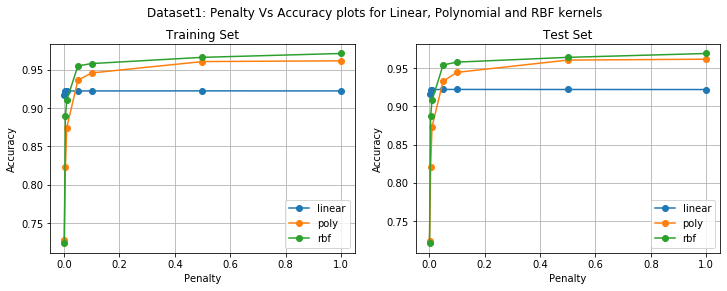

In [16]:
fig_1, ax_1 = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

ax_1[0].plot(x_train_lin, y_train_lin, 'o-', label = 'linear')
ax_1[0].plot(x_train_poly, y_train_poly, 'o-', label = 'poly')
ax_1[0].plot(x_train_rbf, y_train_rbf, 'o-', label = 'rbf')
ax_1[0].set(xlabel='Penalty', ylabel='Accuracy', title = 'Training Set')
ax_1[0].grid()
ax_1[0].legend(loc="lower right")


ax_1[1].plot(x_test_lin, y_test_lin, 'o-', label = 'linear')
ax_1[1].plot(x_test_poly, y_test_poly, 'o-', label = 'poly')
ax_1[1].plot(x_test_rbf, y_test_rbf, 'o-', label = 'rbf')
ax_1[1].set(xlabel='Penalty', ylabel='Accuracy', title = 'Test Set')
ax_1[1].grid()
ax_1[1].legend(loc="lower right")

fig_1.suptitle('Dataset1: Penalty Vs Accuracy plots for Linear, Polynomial and RBF kernels')
fig_1.subplots_adjust(top=0.85)

(<matplotlib.axes._subplots.AxesSubplot at 0x164de075a88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164de11df88>)

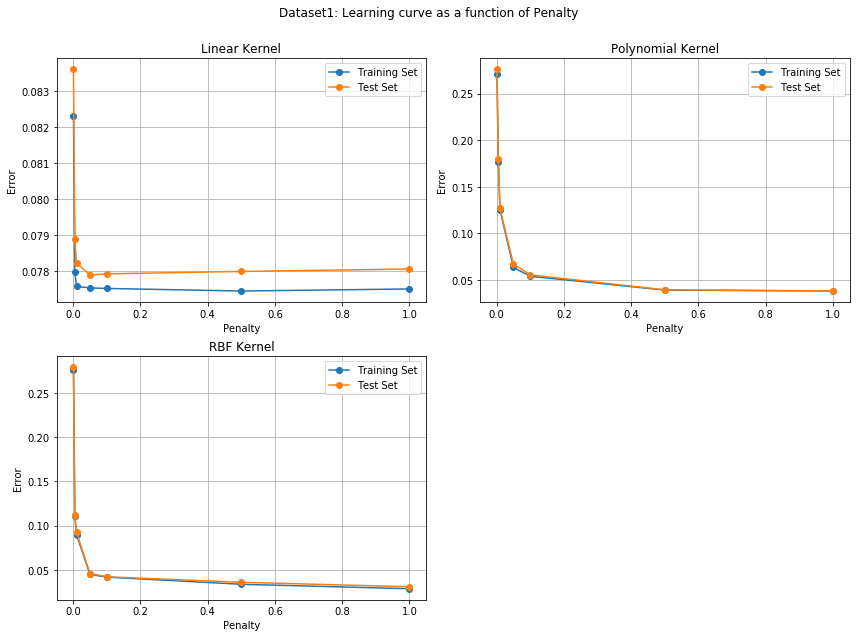

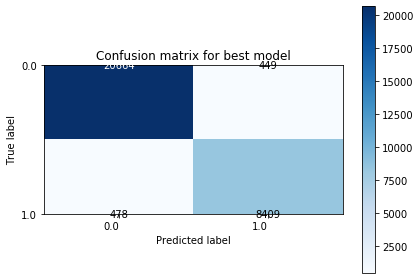

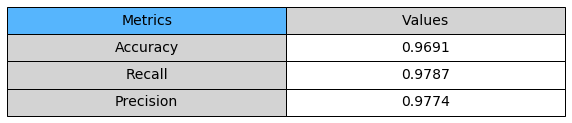

In [17]:
fig_2, ax_2 = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

ax_2[0,0].plot(x1_train_lin, y1_train_lin, 'o-', label = 'Training Set')
ax_2[0,0].plot(x1_test_lin, y1_test_lin, 'o-', label = 'Test Set')
ax_2[0,0].set(xlabel='Penalty', ylabel='Error', title='Linear Kernel')
ax_2[0,0].grid()
ax_2[0,0].legend(loc='upper right')

ax_2[0,1].plot(x1_train_poly, y1_train_poly, 'o-', label = 'Training Set')
ax_2[0,1].plot(x1_test_poly, y1_test_poly, 'o-', label = 'Test Set')
ax_2[0,1].set(xlabel='Penalty', ylabel='Error', title='Polynomial Kernel')
ax_2[0,1].grid()
ax_2[0,1].legend(loc='upper right')

ax_2[1,0].plot(x1_train_rbf, y1_train_rbf, 'o-', label = 'Training Set')
ax_2[1,0].plot(x1_test_rbf, y1_test_rbf, 'o-', label = 'Test Set')
ax_2[1,0].set(xlabel='Penalty', ylabel='Error', title='RBF Kernel')
ax_2[1,0].grid()
ax_2[1,0].legend(loc='upper right')

ax_2[1,1].set_axis_off()

fig_2.suptitle('Dataset1: Learning curve as a function of Penalty')
fig_2.tight_layout()
fig_2.subplots_adjust(top=0.90)

d1_svm_ex21_model = svm_model(svm_train_x, svm_train_y, 'rbf', 1, 3, 'scale', toler)
plot_confusion_matrix(svm_test_y, d1_svm_ex21_model.predict(svm_test_x), classes=set(svm_train_y))

**Audit Data**

In [18]:
## Experimentation
# Expt 1 - Experimenting with Penalty parameter for 3 different kernels
kernel2 = ['linear','poly','rbf']
degree2 = [0,3,0]
C2 = [0.001, 0.01, 0.05, 0.1, 0.3, 0.7, 1]
toler = 0.001

svm2_kern_matrix_train = {}
svm2_kern_matrix_test = {}
svm2_err_matrix_train = {}
svm2_err_matrix_test = {}

for n in range(len(kernel2)):
    svm2_train_acc_matrix = {}
    svm2_test_acc_matrix = {}
    svm2_train_err_matrix = {}
    svm2_test_err_matrix = {}
    for c in C2:
        svm2_mod = svm_model(x2_train, y2_train, kernel2[n], c, degree2[n], 'scale', toler)
        svm2_test_acc_matrix[c] = svm2_mod.score(x2_test, y2_test)
        svm2_train_acc_matrix[c] = svm2_mod.score(x2_train, y2_train)
        svm2_test_err_matrix[c] = 1-svm2_mod.score(x2_test, y2_test)
        svm2_train_err_matrix[c] = 1-svm2_mod.score(x2_train, y2_train)
    svm2_kern_matrix_train[kernel2[n]] = svm2_train_acc_matrix
    svm2_kern_matrix_test[kernel2[n]] = svm2_test_acc_matrix
    svm2_err_matrix_train[kernel2[n]] = svm2_train_err_matrix
    svm2_err_matrix_test[kernel2[n]] = svm2_test_err_matrix

In [19]:
x_train_lin2, y_train_lin2 = zip(*sorted(svm2_kern_matrix_train['linear'].items()))
x_test_lin2, y_test_lin2 = zip(*sorted(svm2_kern_matrix_test['linear'].items()))

x_train_poly2, y_train_poly2 = zip(*sorted(svm2_kern_matrix_train['poly'].items()))
x_test_poly2, y_test_poly2 = zip(*sorted(svm2_kern_matrix_test['poly'].items()))

x_train_rbf2, y_train_rbf2 = zip(*sorted(svm2_kern_matrix_train['rbf'].items()))
x_test_rbf2, y_test_rbf2 = zip(*sorted(svm2_kern_matrix_test['rbf'].items()))

x2_train_lin2, y2_train_lin2 = zip(*sorted(svm2_err_matrix_train['linear'].items()))
x2_test_lin2, y2_test_lin2 = zip(*sorted(svm2_err_matrix_test['linear'].items()))

x2_train_poly2, y2_train_poly2 = zip(*sorted(svm2_err_matrix_train['poly'].items()))
x2_test_poly2, y2_test_poly2 = zip(*sorted(svm2_err_matrix_test['poly'].items()))

x2_train_rbf2, y2_train_rbf2 = zip(*sorted(svm2_err_matrix_train['rbf'].items()))
x2_test_rbf2, y2_test_rbf2 = zip(*sorted(svm2_err_matrix_test['rbf'].items()))

(<matplotlib.axes._subplots.AxesSubplot at 0x164dde89948>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164ddf1ec48>)

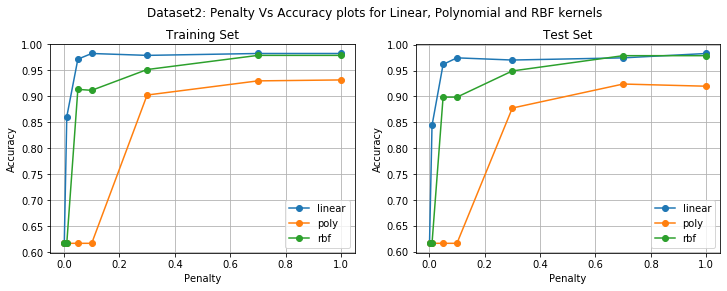

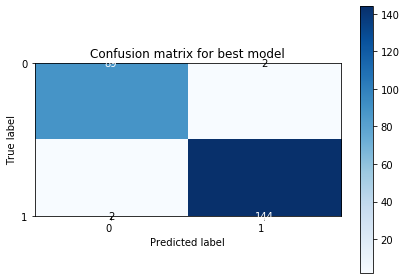

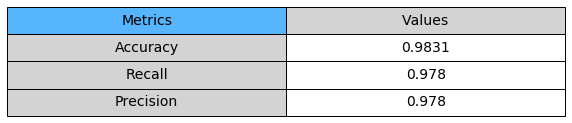

In [20]:
fig_21, ax_21 = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

ax_21[0].plot(x_train_lin2, y_train_lin2, 'o-', label = 'linear')
ax_21[0].plot(x_train_poly2, y_train_poly2, 'o-', label = 'poly')
ax_21[0].plot(x_train_rbf2, y_train_rbf2, 'o-', label = 'rbf')
ax_21[0].set(xlabel='Penalty', ylabel='Accuracy', title = 'Training Set')
ax_21[0].grid()
ax_21[0].legend(loc="lower right")


ax_21[1].plot(x_test_lin2, y_test_lin2, 'o-', label = 'linear')
ax_21[1].plot(x_test_poly2, y_test_poly2, 'o-', label = 'poly')
ax_21[1].plot(x_test_rbf2, y_test_rbf2, 'o-', label = 'rbf')
ax_21[1].set(xlabel='Penalty', ylabel='Accuracy', title = 'Test Set')
ax_21[1].grid()
ax_21[1].legend(loc="lower right")

fig_21.suptitle('Dataset2: Penalty Vs Accuracy plots for Linear, Polynomial and RBF kernels')
fig_21.subplots_adjust(top=0.85)

d2_svm_ex21_model = svm_model(x2_train, y2_train, 'linear', 1, 0, 'scale', toler)
plot_confusion_matrix(y2_test, d2_svm_ex21_model.predict(x2_test), classes=set(y2_train))

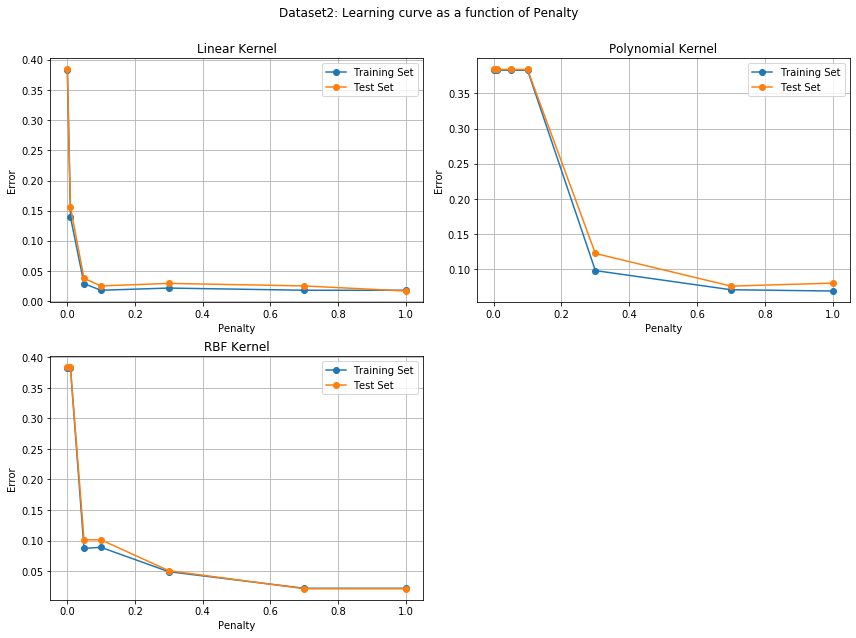

In [21]:
fig_22, ax_22 = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

ax_22[0,0].plot(x2_train_lin2, y2_train_lin2, 'o-', label = 'Training Set')
ax_22[0,0].plot(x2_test_lin2, y2_test_lin2, 'o-', label = 'Test Set')
ax_22[0,0].set(xlabel='Penalty', ylabel='Error', title='Linear Kernel')
ax_22[0,0].grid()
ax_22[0,0].legend(loc='best')

ax_22[0,1].plot(x2_train_poly2, y2_train_poly2, 'o-', label = 'Training Set')
ax_22[0,1].plot(x2_test_poly2, y2_test_poly2, 'o-', label = 'Test Set')
ax_22[0,1].set(xlabel='Penalty', ylabel='Error', title='Polynomial Kernel')
ax_22[0,1].grid()
ax_22[0,1].legend(loc='best')

ax_22[1,0].plot(x2_train_rbf2, y2_train_rbf2, 'o-', label = 'Training Set')
ax_22[1,0].plot(x2_test_rbf2, y2_test_rbf2, 'o-', label = 'Test Set')
ax_22[1,0].set(xlabel='Penalty', ylabel='Error', title='RBF Kernel')
ax_22[1,0].grid()
ax_22[1,0].legend(loc='best')

ax_22[1,1].set_axis_off()

fig_22.suptitle('Dataset2: Learning curve as a function of Penalty')
fig_22.tight_layout()
fig_22.subplots_adjust(top=0.90)

**EXPERIMENT 2.2 - Analysis of 'degree' parameter for Polynomial kernel for varying Penalty parameter values**

In [22]:
poly_degree = [2,3,4,5]
poly_C = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
poly_acc_matrix_train = {}
poly_acc_matrix_test = {}
poly_err_matrix_train = {}
poly_err_matrix_test = {}

for d in poly_degree:
    degree_train_acc = []
    degree_test_acc = []
    degree_train_err = []
    degree_test_err = []
    for c in poly_C:
        poly_svm_mod = svm_model(svm_train_x, svm_train_y, 'poly', c, d, 'scale', toler)
        degree_train_acc.append(poly_svm_mod.score(svm_train_x, svm_train_y))
        degree_test_acc.append(poly_svm_mod.score(svm_test_x, svm_test_y))
        degree_train_err.append(1-poly_svm_mod.score(svm_train_x, svm_train_y))
        degree_test_err.append(1-poly_svm_mod.score(svm_test_x, svm_test_y))
    poly_acc_matrix_train[d] = degree_train_acc
    poly_acc_matrix_test[d] = degree_test_acc
    poly_err_matrix_train[d] = degree_train_err
    poly_err_matrix_test[d] = degree_test_err



In [23]:
y2_train_poly = poly_acc_matrix_train[2]
y3_train_poly = poly_acc_matrix_train[3]
y4_train_poly = poly_acc_matrix_train[4]
y5_train_poly = poly_acc_matrix_train[5]

y2_test_poly = poly_acc_matrix_test[2]
y3_test_poly = poly_acc_matrix_test[3]
y4_test_poly = poly_acc_matrix_test[4]
y5_test_poly = poly_acc_matrix_test[5]

y12_train_poly = poly_err_matrix_train[2]
y13_train_poly = poly_err_matrix_train[3]
y14_train_poly = poly_err_matrix_train[4]
y15_train_poly = poly_err_matrix_train[5]

y12_test_poly = poly_err_matrix_test[2]
y13_test_poly = poly_err_matrix_test[3]
y14_test_poly = poly_err_matrix_test[4]
y15_test_poly = poly_err_matrix_test[5]

(<matplotlib.axes._subplots.AxesSubplot at 0x164df08fd88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164df139c88>)

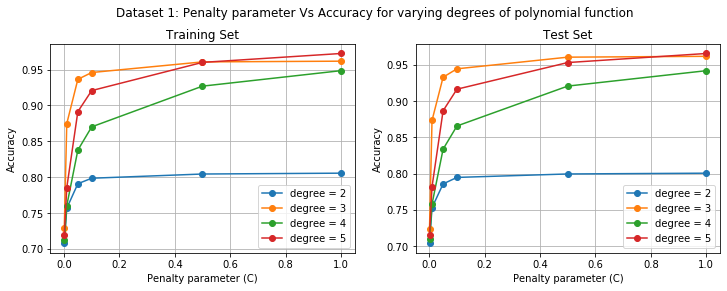

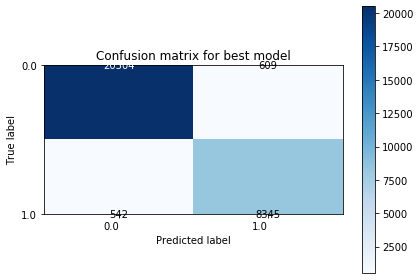

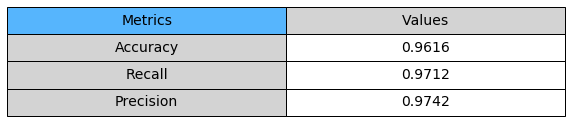

In [24]:
fig_poly, ax_poly = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

ax_poly[0].plot(poly_C, y2_train_poly, 'o-', label='degree = 2')
ax_poly[0].plot(poly_C, y3_train_poly, 'o-', label='degree = 3')
ax_poly[0].plot(poly_C, y4_train_poly, 'o-', label='degree = 4')
ax_poly[0].plot(poly_C, y5_train_poly, 'o-', label='degree = 5')
ax_poly[0].set(xlabel='Penalty parameter (C)', ylabel='Accuracy', title='Training Set')
ax_poly[0].grid()
ax_poly[0].legend(loc="lower right")

ax_poly[1].plot(poly_C, y2_test_poly, 'o-', label='degree = 2')
ax_poly[1].plot(poly_C, y3_test_poly, 'o-', label='degree = 3')
ax_poly[1].plot(poly_C, y4_test_poly, 'o-', label='degree = 4')
ax_poly[1].plot(poly_C, y5_test_poly, 'o-', label='degree = 5')
ax_poly[1].set(xlabel='Penalty parameter (C)', ylabel='Accuracy', title='Test Set')
ax_poly[1].grid()
ax_poly[1].legend(loc="lower right")

fig_poly.suptitle('Dataset 1: Penalty parameter Vs Accuracy for varying degrees of polynomial function')
fig_poly.subplots_adjust(top=0.85)

d1_svm_ex22_model = svm_model(svm_train_x, svm_train_y, 'poly', 1, 3, 'scale', toler)
plot_confusion_matrix(svm_test_y, d1_svm_ex22_model.predict(svm_test_x), classes=set(svm_train_y))

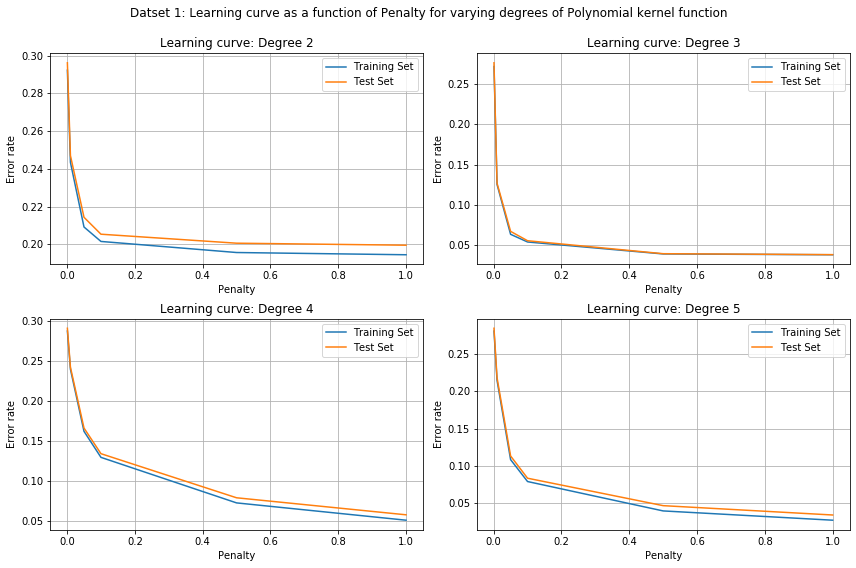

In [25]:
fig2_poly, ax2_poly = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax2_poly[0,0].plot(poly_C, y12_train_poly, label='Training Set')
ax2_poly[0,0].plot(poly_C, y12_test_poly, label='Test Set')
ax2_poly[0,0].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 2')
ax2_poly[0,0].grid()
ax2_poly[0,0].legend(loc='upper right')

ax2_poly[0,1].plot(poly_C, y13_train_poly, label='Training Set')
ax2_poly[0,1].plot(poly_C, y13_test_poly, label='Test Set')
ax2_poly[0,1].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 3')
ax2_poly[0,1].grid()
ax2_poly[0,1].legend(loc='upper right')

ax2_poly[1,0].plot(poly_C, y14_train_poly, label='Training Set')
ax2_poly[1,0].plot(poly_C, y14_test_poly, label='Test Set')
ax2_poly[1,0].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 4')
ax2_poly[1,0].grid()
ax2_poly[1,0].legend(loc='upper right')

ax2_poly[1,1].plot(poly_C, y15_train_poly, label='Training Set')
ax2_poly[1,1].plot(poly_C, y15_test_poly, label='Test Set')
ax2_poly[1,1].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 5')
ax2_poly[1,1].grid()
ax2_poly[1,1].legend(loc='upper right')

fig2_poly.tight_layout()
fig2_poly.suptitle('Datset 1: Learning curve as a function of Penalty for varying degrees of Polynomial kernel function')
fig2_poly.subplots_adjust(top=0.90)

**Audit Dataset**

In [26]:
# Expt 2 - Experimenting with various degree2s for poly2nomial function (with cost)
poly2_degree2 = [2,3,4,5]
poly2_C = [0.001, 0.01, 0.05, 0.1, 0.3, 0.7, 1]
poly2_acc_matrix_train = {}
poly2_acc_matrix_test = {}
poly2_err_matrix_train = {}
poly2_err_matrix_test = {}

for d in poly2_degree2:
    degree2_train_acc = []
    degree2_test_acc = []
    degree2_train_err = []
    degree2_test_err = []
    for c in poly2_C:
        poly2_svm_mod = svm_model(x2_train, y2_train, 'poly', c, d, 'scale', toler)
        degree2_train_acc.append(poly2_svm_mod.score(x2_train, y2_train))
        degree2_test_acc.append(poly2_svm_mod.score(x2_test, y2_test))
        degree2_train_err.append(1-poly2_svm_mod.score(x2_train, y2_train))
        degree2_test_err.append(1-poly2_svm_mod.score(x2_test, y2_test))
    poly2_acc_matrix_train[d] = degree2_train_acc
    poly2_acc_matrix_test[d] = degree2_test_acc
    poly2_err_matrix_train[d] = degree2_train_err
    poly2_err_matrix_test[d] = degree2_test_err

In [27]:
y22_train_poly2 = poly2_acc_matrix_train[2]
y23_train_poly2 = poly2_acc_matrix_train[3]
y24_train_poly2 = poly2_acc_matrix_train[4]
y25_train_poly2 = poly2_acc_matrix_train[5]

y22_test_poly2 = poly2_acc_matrix_test[2]
y23_test_poly2 = poly2_acc_matrix_test[3]
y24_test_poly2 = poly2_acc_matrix_test[4]
y25_test_poly2 = poly2_acc_matrix_test[5]

y122_train_poly2 = poly2_err_matrix_train[2]
y123_train_poly2 = poly2_err_matrix_train[3]
y124_train_poly2 = poly2_err_matrix_train[4]
y125_train_poly2 = poly2_err_matrix_train[5]

y122_test_poly2 = poly2_err_matrix_test[2]
y123_test_poly2 = poly2_err_matrix_test[3]
y124_test_poly2 = poly2_err_matrix_test[4]
y125_test_poly2 = poly2_err_matrix_test[5]

(<matplotlib.axes._subplots.AxesSubplot at 0x164f1498488>,
 <matplotlib.axes._subplots.AxesSubplot at 0x164f251bd48>)

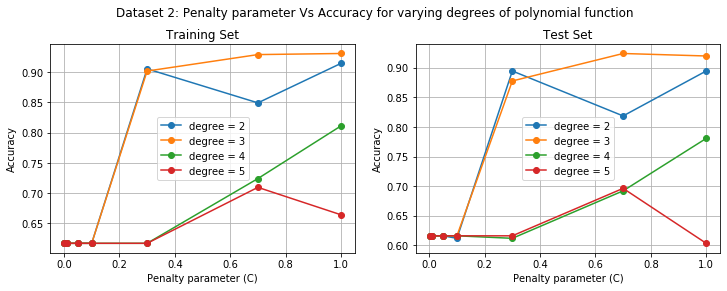

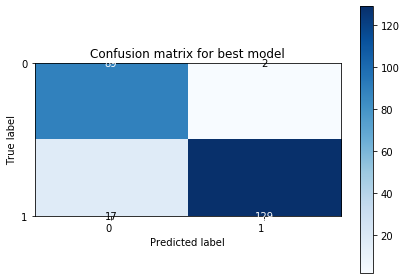

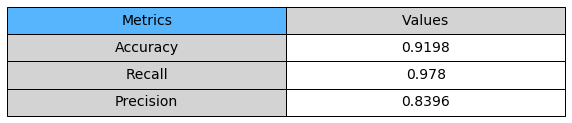

In [28]:
fig_poly2, ax_poly2 = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

ax_poly2[0].plot(poly2_C, y22_train_poly2, 'o-', label='degree = 2')
ax_poly2[0].plot(poly2_C, y23_train_poly2, 'o-', label='degree = 3')
ax_poly2[0].plot(poly2_C, y24_train_poly2, 'o-', label='degree = 4')
ax_poly2[0].plot(poly2_C, y25_train_poly2, 'o-', label='degree = 5')
ax_poly2[0].set(xlabel='Penalty parameter (C)', ylabel='Accuracy', title='Training Set')
ax_poly2[0].grid()
ax_poly2[0].legend(loc="best")

ax_poly2[1].plot(poly2_C, y22_test_poly2, 'o-', label='degree = 2')
ax_poly2[1].plot(poly2_C, y23_test_poly2, 'o-', label='degree = 3')
ax_poly2[1].plot(poly2_C, y24_test_poly2, 'o-', label='degree = 4')
ax_poly2[1].plot(poly2_C, y25_test_poly2, 'o-', label='degree = 5')
ax_poly2[1].set(xlabel='Penalty parameter (C)', ylabel='Accuracy', title='Test Set')
ax_poly2[1].grid()
ax_poly2[1].legend(loc="best")

fig_poly2.suptitle('Dataset 2: Penalty parameter Vs Accuracy for varying degrees of polynomial function')
fig_poly2.subplots_adjust(top=0.85)

d2_svm_ex22_model = svm_model(x2_train, y2_train, 'poly', 1, 3, 'scale', toler)
plot_confusion_matrix(y2_test, d2_svm_ex22_model.predict(x2_test), classes=set(y2_train))

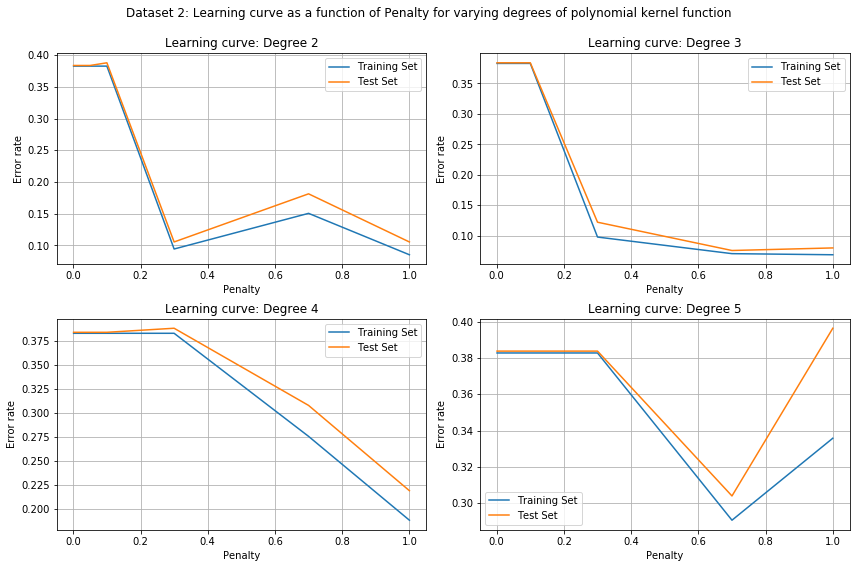

In [29]:
fig2_poly2, ax2_poly2 = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax2_poly2[0,0].plot(poly2_C, y122_train_poly2, label='Training Set')
ax2_poly2[0,0].plot(poly2_C, y122_test_poly2, label='Test Set')
ax2_poly2[0,0].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 2')
ax2_poly2[0,0].grid()
ax2_poly2[0,0].legend(loc='best')

ax2_poly2[0,1].plot(poly2_C, y123_train_poly2, label='Training Set')
ax2_poly2[0,1].plot(poly2_C, y123_test_poly2, label='Test Set')
ax2_poly2[0,1].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 3')
ax2_poly2[0,1].grid()
ax2_poly2[0,1].legend(loc='best')

ax2_poly2[1,0].plot(poly2_C, y124_train_poly2, label='Training Set')
ax2_poly2[1,0].plot(poly2_C, y124_test_poly2, label='Test Set')
ax2_poly2[1,0].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 4')
ax2_poly2[1,0].grid()
ax2_poly2[1,0].legend(loc='best')

ax2_poly2[1,1].plot(poly2_C, y125_train_poly2, label='Training Set')
ax2_poly2[1,1].plot(poly2_C, y125_test_poly2, label='Test Set')
ax2_poly2[1,1].set(xlabel='Penalty', ylabel='Error rate', title='Learning curve: Degree 5')
ax2_poly2[1,1].grid()
ax2_poly2[1,1].legend(loc='best')

fig2_poly2.tight_layout()
fig2_poly2.suptitle('Dataset 2: Learning curve as a function of Penalty for varying degrees of polynomial kernel function')
fig2_poly2.subplots_adjust(top=0.90)

**EXPERIMENT 2.3 - Analysis of 'gamma' parameter (extent of influence of kernel function) for Polynomial, Radial Basis kernel functions**

In [ ]:
# Expt 3 - Experimenting with various gamma values (extent of influence) for Poly and RBF kernel
ex3_kern = ['poly','rbf']
ex3_gamma = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
ex3_acc_matrix_train = {}
ex3_acc_matrix_test = {}
ex3_err_matrix_train = {}
ex3_err_matrix_test = {}


for n in range(len(ex3_kern)):
    gamma_acc_matrix_train = []
    gamma_acc_matrix_test = []
    gamma_err_matrix_train = []
    gamma_err_matrix_test = []
    for g in ex3_gamma:
        rbf_svm_mod = svm_model(svm_train_x, svm_train_y, ex3_kern[n], 1, 3, g, toler)
        gamma_acc_matrix_train.append(rbf_svm_mod.score(svm_train_x, svm_train_y))
        gamma_acc_matrix_test.append(rbf_svm_mod.score(svm_test_x, svm_test_y))
        gamma_err_matrix_train.append(1-rbf_svm_mod.score(svm_train_x, svm_train_y))
        gamma_err_matrix_test.append(1-rbf_svm_mod.score(svm_test_x, svm_test_y))
    ex3_acc_matrix_train[ex3_kern[n]] = gamma_acc_matrix_train
    ex3_acc_matrix_test[ex3_kern[n]] = gamma_acc_matrix_test
    ex3_err_matrix_train[ex3_kern[n]] = gamma_err_matrix_train
    ex3_err_matrix_test[ex3_kern[n]] = gamma_err_matrix_test

In [ ]:
y1_train_ex3 = ex3_acc_matrix_train[ex3_kern[0]]
y2_train_ex3 = ex3_acc_matrix_train[ex3_kern[1]]

y1_test_ex3 = ex3_acc_matrix_test[ex3_kern[0]]
y2_test_ex3 = ex3_acc_matrix_test[ex3_kern[1]]

y11_train_ex3 = ex3_err_matrix_train[ex3_kern[0]]
y12_train_ex3 = ex3_err_matrix_train[ex3_kern[1]]

y11_test_ex3 = ex3_err_matrix_test[ex3_kern[0]]
y12_test_ex3 = ex3_err_matrix_test[ex3_kern[1]]

In [ ]:
fig_rbf, ax_rbf = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax_rbf[0].plot(ex3_gamma, y1_train_ex3, 'o-', label='poly')
ax_rbf[0].plot(ex3_gamma, y2_train_ex3, 'o-', label='rbf')
ax_rbf[0].grid()
ax_rbf[0].set(xlabel='Gamma (extent of influence of kernel function)', ylabel='Accuracy', title='Training Set')
ax_rbf[0].legend(loc='lower right')

ax_rbf[1].plot(ex3_gamma, y1_test_ex3, 'o-', label='poly')
ax_rbf[1].plot(ex3_gamma, y2_test_ex3, 'o-', label='rbf')
ax_rbf[1].set(xlabel='Gamma (extent of influence of kernel function)', ylabel='Accuracy', title='Test Set')
ax_rbf[1].grid()
ax_rbf[1].legend(loc='lower right')

fig_rbf.suptitle('Dataset 1: Gamma (extent of influence of kernel function) Vs Accuracy for Polynomial, RBF')
fig_rbf.subplots_adjust(top=0.85)

d1_svm_ex23_model = svm_model(svm_train_x, svm_train_y, 'rbf', 1, 3, 1, toler)
plot_confusion_matrix(svm_test_y, d1_svm_ex23_model.predict(svm_test_x), classes=set(svm_train_y))

In [ ]:
fig2_ex3, ax2_ex3 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax2_ex3[0].plot(ex3_gamma, y11_train_ex3, 'o-', label='Training Set')
ax2_ex3[0].plot(ex3_gamma, y11_test_ex3, 'o-', label='Test Set')
ax2_ex3[0].set(xlabel='Gamma', ylabel='Error Rate', title='Polynomial Kernel Function')
ax2_ex3[0].grid()
ax2_ex3[0].legend(loc='upper right')

ax2_ex3[1].plot(ex3_gamma, y12_train_ex3, 'o-', label='Training Set')
ax2_ex3[1].plot(ex3_gamma, y12_test_ex3, 'o-', label='Test Set')
ax2_ex3[1].set(xlabel='Gamma', ylabel='Error Rate', title='Radial Basis Kernel Function')
ax2_ex3[1].grid()
ax2_ex3[1].legend(loc='upper right')

fig2_ex3.suptitle('Dataset 1: Learning curve as a function of "gamma" for Polynomial, RBF kernel functions')
fig2_ex3.subplots_adjust(top=0.85)

**Audit Data**

In [ ]:
# Expt 3 - Experimenting with various gamma values (extent of influence) for Poly and RBF kernel
ex3_2_kern = ['poly','rbf']
ex3_2_gamma = [0.0001, 0.001, 0.01,0.1, 1, 5, 10]
ex3_2_acc_matrix_train = {}
ex3_2_acc_matrix_test = {}
ex3_2_err_matrix_train = {}
ex3_2_err_matrix_test = {}


for n in range(len(ex3_2_kern)):
    gamma_2_acc_matrix_train = []
    gamma_2_acc_matrix_test = []
    gamma_2_err_matrix_train = []
    gamma_2_err_matrix_test = []
    for g in ex3_2_gamma:
        rbf_svm_mod2 = svm_model(x2_train, y2_train, ex3_2_kern[n], 1, 3, g, toler)
        gamma_2_acc_matrix_train.append(rbf_svm_mod2.score(x2_train, y2_train))
        gamma_2_acc_matrix_test.append(rbf_svm_mod2.score(x2_test, y2_test))
        gamma_2_err_matrix_train.append(1-rbf_svm_mod2.score(x2_train, y2_train))
        gamma_2_err_matrix_test.append(1-rbf_svm_mod2.score(x2_test, y2_test))
    ex3_2_acc_matrix_train[ex3_2_kern[n]] = gamma_2_acc_matrix_train
    ex3_2_acc_matrix_test[ex3_2_kern[n]] = gamma_2_acc_matrix_test
    ex3_2_err_matrix_train[ex3_2_kern[n]] = gamma_2_err_matrix_train
    ex3_2_err_matrix_test[ex3_2_kern[n]] = gamma_2_err_matrix_test

In [ ]:
y1_train_ex3_2 = ex3_2_acc_matrix_train[ex3_2_kern[0]]
y2_train_ex3_2 = ex3_2_acc_matrix_train[ex3_2_kern[1]]

y1_test_ex3_2 = ex3_2_acc_matrix_test[ex3_2_kern[0]]
y2_test_ex3_2 = ex3_2_acc_matrix_test[ex3_2_kern[1]]

y11_train_ex3_2 = ex3_2_err_matrix_train[ex3_2_kern[0]]
y12_train_ex3_2 = ex3_2_err_matrix_train[ex3_2_kern[1]]

y11_test_ex3_2 = ex3_2_err_matrix_test[ex3_2_kern[0]]
y12_test_ex3_2 = ex3_2_err_matrix_test[ex3_2_kern[1]]

In [ ]:
fig_rbf2, ax_rbf2 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax_rbf2[0].plot(ex3_2_gamma, y1_train_ex3_2, 'o-', label='poly')
ax_rbf2[0].plot(ex3_2_gamma, y2_train_ex3_2, 'o-', label='rbf')
ax_rbf2[0].grid()
ax_rbf2[0].set(xlabel='Gamma (extent of influence of kernel function)', ylabel='Accuracy', title='Training Set')
ax_rbf2[0].legend(loc='lower right')

ax_rbf2[1].plot(ex3_2_gamma, y1_test_ex3_2, 'o-', label='poly')
ax_rbf2[1].plot(ex3_2_gamma, y2_test_ex3_2, 'o-', label='rbf')
ax_rbf2[1].set(xlabel='Gamma (extent of influence of kernel function)', ylabel='Accuracy', title='Test Set')
ax_rbf2[1].grid()
ax_rbf2[1].legend(loc='lower right')

fig_rbf2.suptitle('Dataset 2: Gamma (extent of influence of kernel function) Vs Accuracy for Polynomial, RBF')
fig_rbf2.subplots_adjust(top=0.85)

d2_svm_ex23_model = svm_model(x2_train, y2_train, 'rbf', 1, 3, 1, toler)
plot_confusion_matrix(y2_test, d2_svm_ex23_model.predict(x2_test), classes=set(y2_train))

In [ ]:
fig2_rbf2, ax2_rbf2 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax2_rbf2[0].plot(ex3_2_gamma, y11_train_ex3_2, 'o-', label='Training Set')
ax2_rbf2[0].plot(ex3_2_gamma, y11_test_ex3_2, 'o-', label='Test Set')
ax2_rbf2[0].set(xlabel='Gamma', ylabel='Error Rate', title='Polynomial Kernel Function')
ax2_rbf2[0].grid()
ax2_rbf2[0].legend(loc='best')

ax2_rbf2[1].plot(ex3_2_gamma, y12_train_ex3_2, 'o-', label='Training Set')
ax2_rbf2[1].plot(ex3_2_gamma, y12_test_ex3_2, 'o-', label='Test Set')
ax2_rbf2[1].set(xlabel='Gamma', ylabel='Error Rate', title='Radial Basis Kernel Function')
ax2_rbf2[1].grid()
ax2_rbf2[1].legend(loc='best')

fig2_rbf2.suptitle('Dataset 2: Learning curve as a function of "gamma" for Polynomial, RBF kernel functions')
fig2_rbf2.subplots_adjust(top=0.85)

**Decission Tree Experimentation**
Learning curves as a function of depth of the tree_

In [13]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

def DT(x, y, maxdepth, threshold_impurity):
    if(maxdepth==0):
        dt_model = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease = threshold_impurity, random_state = random_num)
    else:
        dt_model = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth, min_impurity_decrease = threshold_impurity, random_state = random_num)
    dt_model.fit(x,y)
    return(dt_model)

**Dataset1**

In [14]:
# Train test split       
from sklearn.model_selection import train_test_split
d1_train, d1_test = train_test_split(df2, test_size = 0.3, random_state = 40)
target_col = 'y'  

d1_train_y = d1_train[target_col]
d1_train_x = d1_train.loc[:, d1_train.columns!=target_col]
d1_test_y = d1_test[target_col]
d1_test_x = d1_test.loc[:, d1_test.columns!=target_col]

dt_depth = range(1,30)
dt_depth_acc_train = []
dt_depth_acc_test = []
dt_depth_err_train = []
dt_depth_err_test = []

for d in dt_depth:
    dt_mod = DT(d1_train_x, d1_train_y, d, 0)
    dt_depth_acc_train.append(dt_mod.score(d1_train_x, d1_train_y))
    dt_depth_acc_test.append(dt_mod.score(d1_test_x, d1_test_y))
    dt_depth_err_train.append(1-dt_mod.score(d1_train_x, d1_train_y))
    dt_depth_err_test.append(1-dt_mod.score(d1_test_x, d1_test_y))

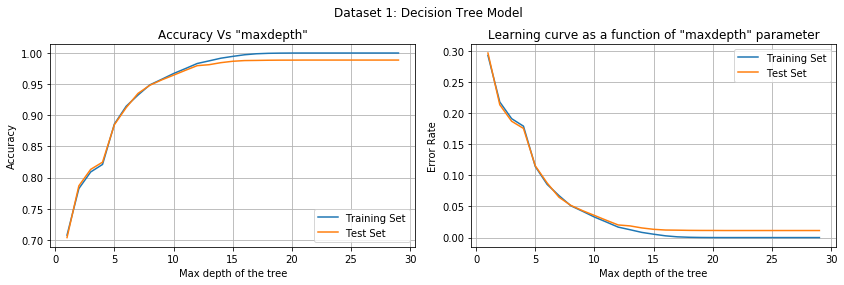

In [15]:
fig_dt1, ax_dt1 = plt.subplots(ncols=2,nrows=1,figsize=(12,4))

ax_dt1[0].plot(dt_depth, dt_depth_acc_train, label='Training Set')
ax_dt1[0].plot(dt_depth, dt_depth_acc_test, label = 'Test Set')
ax_dt1[0].set(xlabel='Max depth of the tree', ylabel='Accuracy', title='Accuracy Vs "maxdepth"')
ax_dt1[0].grid()
ax_dt1[0].legend(loc='lower right')

ax_dt1[1].plot(dt_depth, dt_depth_err_train, label='Training Set')
ax_dt1[1].plot(dt_depth, dt_depth_err_test, label = 'Test Set')
ax_dt1[1].set(xlabel='Max depth of the tree', ylabel='Error Rate', title='Learning curve as a function of "maxdepth" parameter')
ax_dt1[1].grid()
ax_dt1[1].legend(loc='upper right')

fig_dt1.tight_layout()
fig_dt1.suptitle('Dataset 1: Decision Tree Model')
fig_dt1.subplots_adjust(top=0.85)

In [ ]:
pip install graphviz

(<matplotlib.axes._subplots.AxesSubplot at 0x2729d9d7748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2729da33848>)

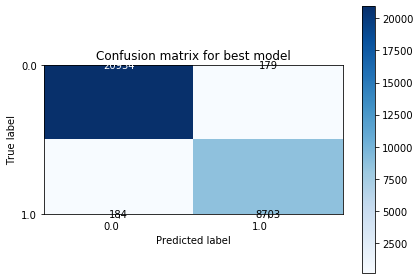

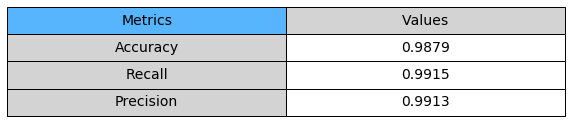

In [16]:
import graphviz
from sklearn import tree
d1_model = DT(d1_train_x, d1_train_y, 16, 0)
cols = list(d1_train_x.columns)
dot_data = tree.export_graphviz(d1_model,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset1_DT_BestModel_maxdepth",view=True)

plot_confusion_matrix(d1_test_y, d1_model.predict(d1_test_x), classes=set(d1_train_y))

**Audit Data**

In [17]:
# Train Test split
from sklearn.model_selection import train_test_split,cross_val_score
d2_train_x, d2_test_x, d2_train_y, d2_test_y = train_test_split(X2, Y2, test_size = 0.3,stratify=Y2, random_state = 4)

In [18]:
d2_depth_acc_train = []
d2_depth_acc_test = []
d2_depth_err_train = []
d2_depth_err_test = []
d2_depth = range(1,11)

for d in d2_depth:
    d2_mod = DT(d2_train_x, d2_train_y, d, 0)
    d2_depth_acc_train.append(d2_mod.score(d2_train_x, d2_train_y))
    d2_depth_acc_test.append(d2_mod.score(d2_test_x, d2_test_y))
    d2_depth_err_train.append(1-d2_mod.score(d2_train_x, d2_train_y))
    d2_depth_err_test.append(1-d2_mod.score(d2_test_x, d2_test_y))

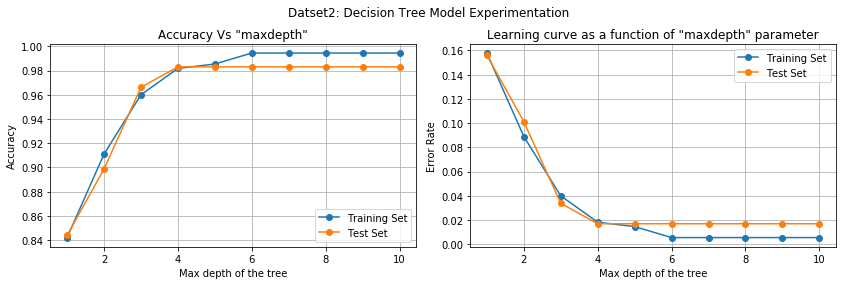

In [19]:
fig_dt2, ax_dt2 = plt.subplots(ncols=2,nrows=1,figsize=(12,4))

ax_dt2[0].plot(d2_depth, d2_depth_acc_train, 'o-', label='Training Set')
ax_dt2[0].plot(d2_depth, d2_depth_acc_test, 'o-', label = 'Test Set')
ax_dt2[0].set(xlabel='Max depth of the tree', ylabel='Accuracy', title='Accuracy Vs "maxdepth"')
ax_dt2[0].grid()
ax_dt2[0].legend(loc='lower right')

ax_dt2[1].plot(d2_depth, d2_depth_err_train, 'o-', label='Training Set')
ax_dt2[1].plot(d2_depth, d2_depth_err_test, 'o-', label = 'Test Set')
ax_dt2[1].set(xlabel='Max depth of the tree', ylabel='Error Rate', title='Learning curve as a function of "maxdepth" parameter')
ax_dt2[1].grid()
ax_dt2[1].legend(loc='upper right')

fig_dt2.tight_layout()
fig_dt2.suptitle('Datset2: Decision Tree Model Experimentation')
fig_dt2.subplots_adjust(top=0.85)

(<matplotlib.axes._subplots.AxesSubplot at 0x2729dbd5688>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2729dc6b448>)

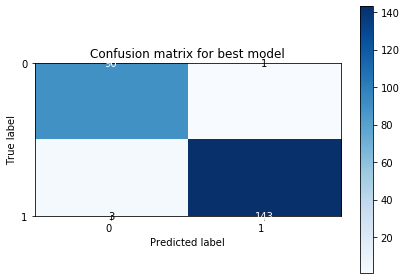

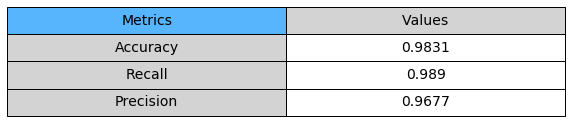

In [20]:
import graphviz
from sklearn import tree
d2_model = DT(d2_train_x, d2_train_y, 4, 0)
cols = list(d2_train_x.columns)
dot_data = tree.export_graphviz(d2_model,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset2_DT_BestModel_maxdepth",view=True)

plot_confusion_matrix(d2_test_y, d2_model.predict(d2_test_x), classes=set(d2_train_y))

**Experimenting with pruning**

**Dataset1**

In [21]:
# Pruning function based on number of samples as control parameter
from sklearn.tree._tree import TREE_LEAF

def pruning_dt(dtree, index, threshold):
    if dtree.tree_.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        dtree.tree_.children_left[index] = TREE_LEAF
        dtree.tree_.children_right[index] = TREE_LEAF
    # traversing through child nodes as well
    if dtree.tree_.children_left[index] != TREE_LEAF:
        pruning_dt(dtree, dtree.tree_.children_left[index], threshold)
        pruning_dt(dtree, dtree.tree_.children_right[index], threshold)
    return(dtree)

In [22]:
prunes = range(1,10)
dd_depth_acc_train_orig = []
dd_depth_acc_test_orig = []
dd_depth_acc_train = []
dd_depth_acc_test = []
dd_depth_err_train_orig = []
dd_depth_err_test_orig = []
dd_depth_err_train = []
dd_depth_err_test = []

for p in prunes:
    dd_mod = DT(d1_train_x, d1_train_y, 27, 0)
    dd_depth_acc_train_orig.append(dd_mod.score(d1_train_x, d1_train_y))
    dd_depth_err_train_orig.append(1-dd_mod.score(d1_train_x, d1_train_y))
    dd_depth_acc_test_orig.append(dd_mod.score(d1_test_x, d1_test_y))
    dd_depth_err_test_orig.append(1-dd_mod.score(d1_test_x, d1_test_y))
    
    dd_mod2 = pruning_dt(dd_mod, 0, p)
    dd_depth_acc_train.append(dd_mod2.score(d1_train_x, d1_train_y))
    dd_depth_acc_test.append(dd_mod2.score(d1_test_x, d1_test_y))
    dd_depth_err_train.append(1-dd_mod2.score(d1_train_x, d1_train_y))
    dd_depth_err_test.append(1-dd_mod2.score(d1_test_x, d1_test_y))

(<matplotlib.axes._subplots.AxesSubplot at 0x2729ddc5bc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x272a1f64688>)

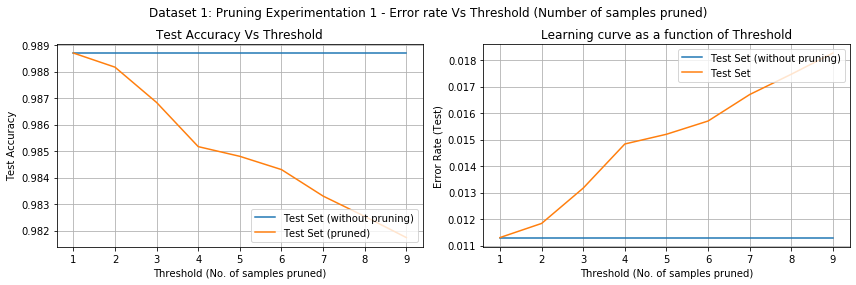

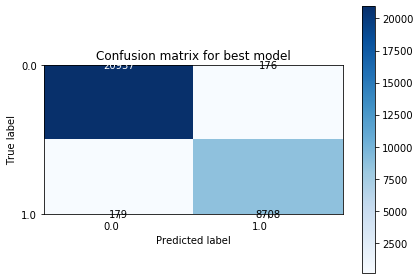

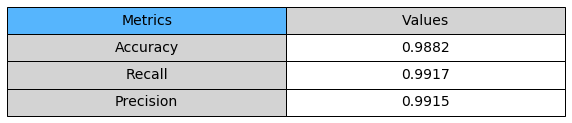

In [23]:
fig_dd, ax_dd = plt.subplots(ncols=2,nrows=1,figsize=(12,4))

#ax_dd[0].plot(prunes, dd_depth_acc_train_orig, label='Training Set (without pruning)')
ax_dd[0].plot(prunes, dd_depth_acc_test_orig, label='Test Set (without pruning)')
#ax_dd[0].plot(prunes, dd_depth_acc_train, label='Training Set (pruned)')
ax_dd[0].plot(prunes, dd_depth_acc_test, label = 'Test Set (pruned)')
ax_dd[0].set(xlabel='Threshold (No. of samples pruned)', ylabel='Test Accuracy', title='Test Accuracy Vs Threshold')
ax_dd[0].grid()
ax_dd[0].legend(loc='lower right')

#ax_dd[1].plot(prunes, dd_depth_err_train_orig, label='Training Set (without pruning)')
ax_dd[1].plot(prunes, dd_depth_err_test_orig, label='Test Set (without pruning)')
#ax_dd[1].plot(prunes, dd_depth_err_train, label='Training Set (pruned)')
ax_dd[1].plot(prunes, dd_depth_err_test, label = 'Test Set')
ax_dd[1].set(xlabel='Threshold (No. of samples pruned)', ylabel='Error Rate (Test)', title='Learning curve as a function of Threshold')
ax_dd[1].grid()
ax_dd[1].legend(loc='upper right')

fig_dd.tight_layout()
fig_dd.suptitle('Dataset 1: Pruning Experimentation 1 - Error rate Vs Threshold (Number of samples pruned)')
fig_dd.subplots_adjust(top=0.85)

import graphviz
from sklearn import tree
d1_model_ex2 = DT(d1_train_x, d1_train_y, 27, 0)
d1_model_ex2 = pruning_dt(d1_model_ex2, 0, 2)
cols = list(d1_train_x.columns)
dot_data = tree.export_graphviz(d1_model_ex2,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset1_DT_BestModel_pruning",view=True)

plot_confusion_matrix(d1_test_y, d1_model_ex2.predict(d1_test_x), classes=set(d1_train_y))

In [24]:
d1_depth_acc_train_orig = []
d1_depth_acc_test_orig = []
d1_depth_acc_train = []
d1_depth_acc_test = []
d1_depth_err_train_orig = []
d1_depth_err_test_orig = []
d1_depth_err_train = []
d1_depth_err_test = []

for d in dt_depth:
    d1_mod = DT(d1_train_x, d1_train_y, d, 0)
    d1_depth_acc_train_orig.append(d1_mod.score(d1_train_x, d1_train_y))
    d1_depth_err_train_orig.append(1-d1_mod.score(d1_train_x, d1_train_y))
    d1_depth_acc_test_orig.append(d1_mod.score(d1_test_x, d1_test_y))
    d1_depth_err_test_orig.append(1-d1_mod.score(d1_test_x, d1_test_y))
    
    d1_mod2 = pruning_dt(d1_mod, 0, 5)
    d1_depth_acc_train.append(d1_mod2.score(d1_train_x, d1_train_y))
    d1_depth_acc_test.append(d1_mod2.score(d1_test_x, d1_test_y))
    d1_depth_err_train.append(1-d1_mod2.score(d1_train_x, d1_train_y))
    d1_depth_err_test.append(1-d1_mod2.score(d1_test_x, d1_test_y))

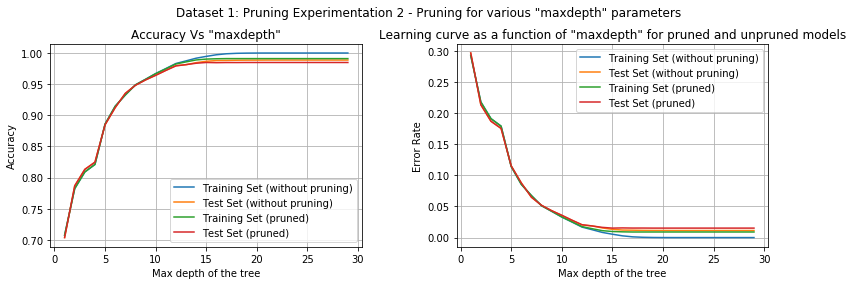

In [25]:
fig_d1, ax_d1 = plt.subplots(ncols=2,nrows=1,figsize=(12,4))

ax_d1[0].plot(dt_depth, d1_depth_acc_train_orig, label='Training Set (without pruning)')
ax_d1[0].plot(dt_depth, d1_depth_acc_test_orig, label='Test Set (without pruning)')
ax_d1[0].plot(dt_depth, d1_depth_acc_train, label='Training Set (pruned)')
ax_d1[0].plot(dt_depth, d1_depth_acc_test, label = 'Test Set (pruned)')
ax_d1[0].set(xlabel='Max depth of the tree', ylabel='Accuracy', title='Accuracy Vs "maxdepth"')
ax_d1[0].grid()
ax_d1[0].legend(loc='lower right')

ax_d1[1].plot(dt_depth, d1_depth_err_train_orig, label='Training Set (without pruning)')
ax_d1[1].plot(dt_depth, d1_depth_err_test_orig, label='Test Set (without pruning)')
ax_d1[1].plot(dt_depth, d1_depth_err_train, label='Training Set (pruned)')
ax_d1[1].plot(dt_depth, d1_depth_err_test, label = 'Test Set (pruned)')
ax_d1[1].set(xlabel='Max depth of the tree', ylabel='Error Rate', title='Learning curve as a function of "maxdepth" for pruned and unpruned models')
ax_d1[1].grid()
ax_d1[1].legend(loc='upper right')

fig_d1.tight_layout()
fig_d1.suptitle('Dataset 1: Pruning Experimentation 2 - Pruning for various "maxdepth" parameters')
fig_d1.subplots_adjust(top=0.85)

**Audit Dataset**

In [26]:
prunes2 = [10,20,30,40,50,60]
dd2_depth_acc_train_orig = []
dd2_depth_acc_test_orig = []
dd2_depth_acc_train = []
dd2_depth_acc_test = []
dd2_depth_err_train_orig = []
dd2_depth_err_test_orig = []
dd2_depth_err_train = []
dd2_depth_err_test = []

for p in prunes2:
    dd2_mod = DT(d2_train_x, d2_train_y, 4, 0)
    dd2_depth_acc_train_orig.append(dd2_mod.score(d2_train_x, d2_train_y))
    dd2_depth_err_train_orig.append(1-dd2_mod.score(d2_train_x, d2_train_y))
    dd2_depth_acc_test_orig.append(dd2_mod.score(d2_test_x, d2_test_y))
    dd2_depth_err_test_orig.append(1-dd2_mod.score(d2_test_x, d2_test_y))
    
    dd2_mod2 = pruning_dt(dd2_mod, 0, p)
    dd2_depth_acc_train.append(dd2_mod2.score(d2_train_x, d2_train_y))
    dd2_depth_acc_test.append(dd2_mod2.score(d2_test_x, d2_test_y))
    dd2_depth_err_train.append(1-dd2_mod2.score(d2_train_x, d2_train_y))
    dd2_depth_err_test.append(1-dd2_mod2.score(d2_test_x, d2_test_y))

(<matplotlib.axes._subplots.AxesSubplot at 0x272a21f4688>,
 <matplotlib.axes._subplots.AxesSubplot at 0x272a227ea88>)

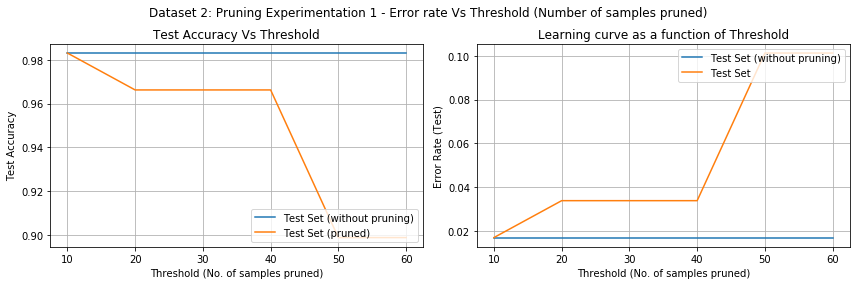

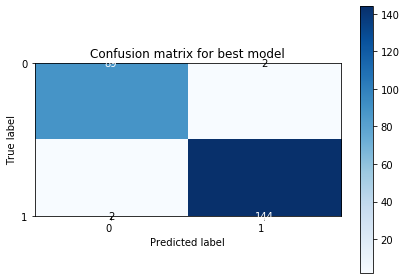

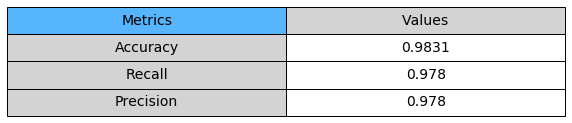

In [27]:
fig_dd2, ax_dd2 = plt.subplots(ncols=2,nrows=1,figsize=(12,4))

#ax_dd2[0].plot(prunes2, dd2_depth_acc_train_orig, label='Training Set (without pruning)')
ax_dd2[0].plot(prunes2, dd2_depth_acc_test_orig, label='Test Set (without pruning)')
#ax_dd2[0].plot(prunes2, dd2_depth_acc_train, label='Training Set (pruned)')
ax_dd2[0].plot(prunes2, dd2_depth_acc_test, label = 'Test Set (pruned)')
ax_dd2[0].set(xlabel='Threshold (No. of samples pruned)', ylabel='Test Accuracy', title='Test Accuracy Vs Threshold')
ax_dd2[0].grid()
ax_dd2[0].legend(loc='lower right')

#ax_dd2[1].plot(prunes2, dd2_depth_err_train_orig, label='Training Set (without pruning)')
ax_dd2[1].plot(prunes2, dd2_depth_err_test_orig, label='Test Set (without pruning)')
#ax_dd2[1].plot(prunes2, dd2_depth_err_train, label='Training Set (pruned)')
ax_dd2[1].plot(prunes2, dd2_depth_err_test, label = 'Test Set')
ax_dd2[1].set(xlabel='Threshold (No. of samples pruned)', ylabel='Error Rate (Test)', title='Learning curve as a function of Threshold')
ax_dd2[1].grid()
ax_dd2[1].legend(loc='upper right')

fig_dd2.tight_layout()
fig_dd2.suptitle('Dataset 2: Pruning Experimentation 1 - Error rate Vs Threshold (Number of samples pruned)')
fig_dd2.subplots_adjust(top=0.85)

import graphviz
from sklearn import tree
d2_model_ex2 = DT(d2_train_x, d2_train_y, 4, 0)
d2_model_ex2 = pruning_dt(d2_model_ex2, 0, 10)
cols = list(d2_train_x.columns)
dot_data = tree.export_graphviz(d2_model_ex2,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset2_DT_BestModel_pruning",view=True)

plot_confusion_matrix(d2_test_y, d2_model_ex2.predict(d2_test_x), classes=set(d2_train_y))

In [28]:
d2_depth_acc_train_orig = []
d2_depth_acc_test_orig = []
d2_depth_acc_train = []
d2_depth_acc_test = []
d2_depth_err_train_orig = []
d2_depth_err_test_orig = []
d2_depth_err_train = []
d2_depth_err_test = []
d2_depth = [1,2,3,4,5,6]

for d in d2_depth:
    d2_mod = DT(d2_train_x, d2_train_y, d, 0)
    d2_depth_acc_train_orig.append(d2_mod.score(d2_train_x, d2_train_y))
    d2_depth_err_train_orig.append(1-d2_mod.score(d2_train_x, d2_train_y))
    d2_depth_acc_test_orig.append(d2_mod.score(d2_test_x, d2_test_y))
    d2_depth_err_test_orig.append(1-d2_mod.score(d2_test_x, d2_test_y))
    
    d2_mod2 = pruning_dt(d2_mod, 0, 20)
    d2_depth_acc_train.append(d2_mod2.score(d2_train_x, d2_train_y))
    d2_depth_acc_test.append(d2_mod2.score(d2_test_x, d2_test_y))
    d2_depth_err_train.append(1-d2_mod2.score(d2_train_x, d2_train_y))
    d2_depth_err_test.append(1-d2_mod2.score(d2_test_x, d2_test_y))

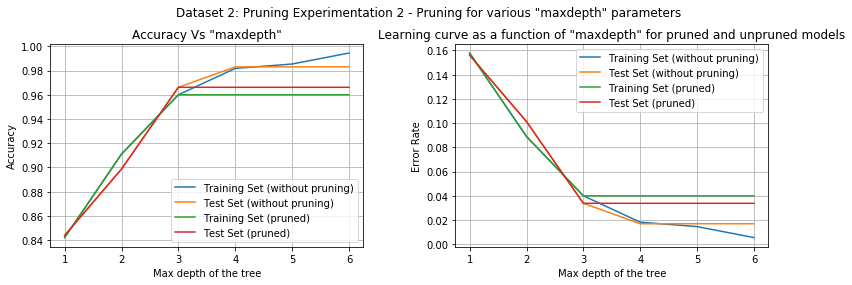

In [29]:
fig_d2, ax_d2 = plt.subplots(ncols=2,nrows=1,figsize=(12,4))

ax_d2[0].plot(d2_depth, d2_depth_acc_train_orig, label='Training Set (without pruning)')
ax_d2[0].plot(d2_depth, d2_depth_acc_test_orig, label='Test Set (without pruning)')
ax_d2[0].plot(d2_depth, d2_depth_acc_train, label='Training Set (pruned)')
ax_d2[0].plot(d2_depth, d2_depth_acc_test, label = 'Test Set (pruned)')
ax_d2[0].set(xlabel='Max depth of the tree', ylabel='Accuracy', title='Accuracy Vs "maxdepth"')
ax_d2[0].grid()
ax_d2[0].legend(loc='lower right')

ax_d2[1].plot(d2_depth, d2_depth_err_train_orig, label='Training Set (without pruning)')
ax_d2[1].plot(d2_depth, d2_depth_err_test_orig, label='Test Set (without pruning)')
ax_d2[1].plot(d2_depth, d2_depth_err_train, label='Training Set (pruned)')
ax_d2[1].plot(d2_depth, d2_depth_err_test, label = 'Test Set (pruned)')
ax_d2[1].set(xlabel='Max depth of the tree', ylabel='Error Rate', title='Learning curve as a function of "maxdepth" for pruned and unpruned models')
ax_d2[1].grid()
ax_d2[1].legend(loc='upper right')

fig_d2.tight_layout()
fig_d2.suptitle('Dataset 2: Pruning Experimentation 2 - Pruning for various "maxdepth" parameters')
fig_d2.subplots_adjust(top=0.85)

**Implementation of boosting** Expeiment 4.1**

**Dataset1**

In [30]:
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

def boost_dt(x, y, num_estimators, min_samples_in_leaf, maxdepths):
    gb_model = GradientBoostingClassifier(max_depth=maxdepths, n_estimators=num_estimators, min_samples_leaf=min_samples_in_leaf, random_state=random_num)
    gb_model.fit(x,y)
    return(gb_model)

In [31]:
gb_d1_train_acc = []
gb_d1_test_acc = []
gb_d1_train_err = []
gb_d1_test_err = []

n_forests = [10,20,30,40,50]
for n in n_forests:
    gb_mod = boost_dt(d1_train_x, d1_train_y, n, 1, 10)
    gb_d1_train_acc.append(gb_mod.score(d1_train_x, d1_train_y))
    gb_d1_test_acc.append(gb_mod.score(d1_test_x, d1_test_y))
    
    gb_d1_train_err.append(1-gb_mod.score(d1_train_x, d1_train_y))
    gb_d1_test_err.append(1-gb_mod.score(d1_test_x, d1_test_y))

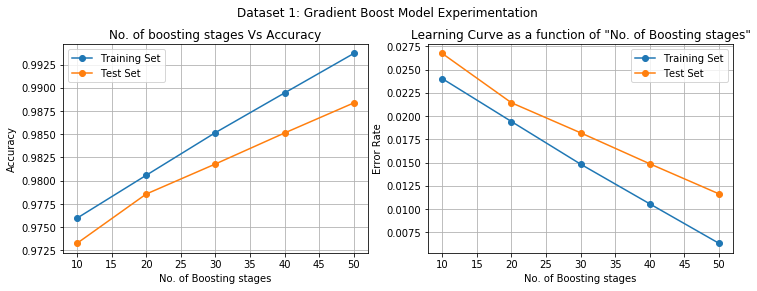

In [32]:
fig_gb1, ax_gb1 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax_gb1[0].plot(n_forests, gb_d1_train_acc,'o-', label='Training Set')
ax_gb1[0].plot(n_forests, gb_d1_test_acc,'o-', label='Test Set')
ax_gb1[0].set(xlabel='No. of Boosting stages', ylabel='Accuracy', title='No. of boosting stages Vs Accuracy')
ax_gb1[0].grid()
ax_gb1[0].legend(loc='best')

ax_gb1[1].plot(n_forests, gb_d1_train_err,'o-', label='Training Set')
ax_gb1[1].plot(n_forests, gb_d1_test_err,'o-', label='Test Set')
ax_gb1[1].set(xlabel='No. of Boosting stages', ylabel='Error Rate', title='Learning Curve as a function of "No. of Boosting stages"')
ax_gb1[1].grid()
ax_gb1[1].legend(loc='best')

fig_gb1.suptitle('Dataset 1: Gradient Boost Model Experimentation')
fig_gb1.subplots_adjust(top=0.85)

(<matplotlib.axes._subplots.AxesSubplot at 0x272a25baec8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x272a264a788>)

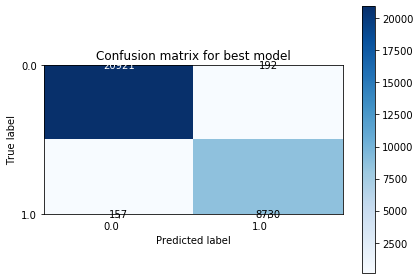

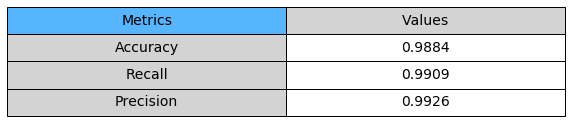

In [33]:
import graphviz
from sklearn import tree
d1_ex41_model = boost_dt(d1_train_x, d1_train_y, 50, 1, 10)
d1_ex41_tree = d1_ex41_model.estimators_[49,0]
cols = list(d1_train_x.columns)
dot_data = tree.export_graphviz(d1_ex41_tree,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset1_GB_BestModel_boosts",view=True)

plot_confusion_matrix(d1_test_y, d1_ex41_model.predict(d1_test_x), classes=set(d1_train_y))

**Audit Data**

In [34]:
gb_d2_train_acc = []
gb_d2_test_acc = []
gb_d2_train_err = []
gb_d2_test_err = []

boosts_n = [10,20,30,40,50]
for n in boosts_n:
    gb_mod2 = boost_dt(d2_train_x, d2_train_y, n, 1, 3)
    gb_d2_train_acc.append(gb_mod2.score(d2_train_x, d2_train_y))
    gb_d2_test_acc.append(gb_mod2.score(d2_test_x, d2_test_y))
    
    gb_d2_train_err.append(1-gb_mod2.score(d2_train_x, d2_train_y))
    gb_d2_test_err.append(1-gb_mod2.score(d2_test_x, d2_test_y))

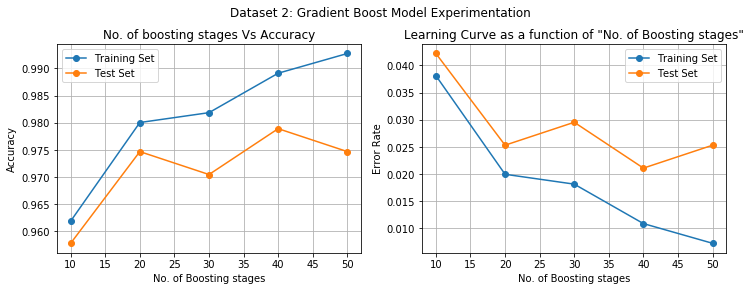

In [35]:
fig_gb2, ax_gb2 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax_gb2[0].plot(boosts_n, gb_d2_train_acc,'o-', label='Training Set')
ax_gb2[0].plot(boosts_n, gb_d2_test_acc,'o-', label='Test Set')
ax_gb2[0].set(xlabel='No. of Boosting stages', ylabel='Accuracy', title='No. of boosting stages Vs Accuracy')
ax_gb2[0].grid()
ax_gb2[0].legend(loc='best')

ax_gb2[1].plot(boosts_n, gb_d2_train_err,'o-', label='Training Set')
ax_gb2[1].plot(boosts_n, gb_d2_test_err,'o-', label='Test Set')
ax_gb2[1].set(xlabel='No. of Boosting stages', ylabel='Error Rate', title='Learning Curve as a function of "No. of Boosting stages"')
ax_gb2[1].grid()
ax_gb2[1].legend(loc='best')

fig_gb2.suptitle('Dataset 2: Gradient Boost Model Experimentation')
fig_gb2.subplots_adjust(top=0.85)

(<matplotlib.axes._subplots.AxesSubplot at 0x272a27dd8c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x272a2860988>)

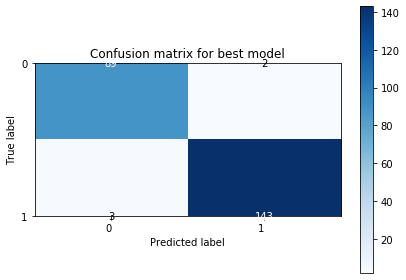

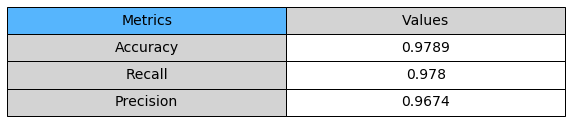

In [36]:
import graphviz
from sklearn import tree
d2_ex41_model = boost_dt(d2_train_x, d2_train_y, 40, 1, 3)
d2_ex41_tree = d2_ex41_model.estimators_[39,0]
cols = list(d2_train_x.columns)
dot_data = tree.export_graphviz(d2_ex41_tree,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset2_GB_BestModel_boosts",view=True)

plot_confusion_matrix(d2_test_y, d2_ex41_model.predict(d2_test_x), classes=set(d2_train_y))

**Experiment 4.2 Experiment with pruning**

**Dataset1**

In [37]:
min_num_samples = range(1,10)
num_of_boosts = 50

gb2_d1_train_acc = []
gb2_d1_test_acc = []
gb2_d1_train_err = []
gb2_d1_test_err = []

gb2_d1_train_acc_orig = []
gb2_d1_test_acc_orig = []
gb2_d1_train_err_orig = []
gb2_d1_test_err_orig = []


for m in min_num_samples:
    gb2_mod_orig = boost_dt(d1_train_x, d1_train_y, num_of_boosts, 1, 10)
    gb2_d1_train_acc_orig.append(gb2_mod_orig.score(d1_train_x, d1_train_y))
    gb2_d1_test_acc_orig.append(gb2_mod_orig.score(d1_test_x, d1_test_y))  
    gb2_d1_train_err_orig.append(1-gb2_mod_orig.score(d1_train_x, d1_train_y))
    gb2_d1_test_err_orig.append(1-gb2_mod_orig.score(d1_test_x, d1_test_y))
    
    gb2_mod = boost_dt(d1_train_x, d1_train_y, num_of_boosts, m, 10)
    gb2_d1_train_acc.append(gb2_mod.score(d1_train_x, d1_train_y))
    gb2_d1_test_acc.append(gb2_mod.score(d1_test_x, d1_test_y))   
    gb2_d1_train_err.append(1-gb2_mod.score(d1_train_x, d1_train_y))
    gb2_d1_test_err.append(1-gb2_mod.score(d1_test_x, d1_test_y))

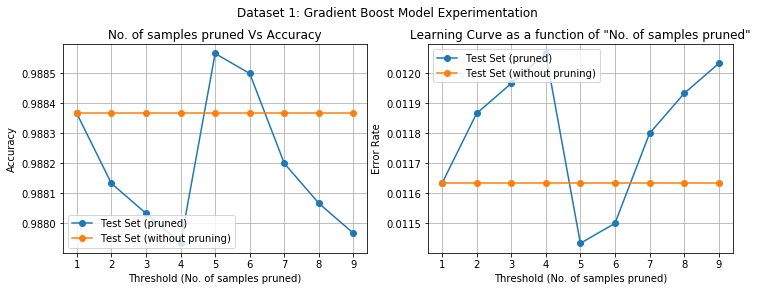

In [38]:
fig_gb2, ax_gb2 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

#ax_gb2[0].plot(min_num_samples, gb2_d1_train_acc, label='Training Set (pruned)')
ax_gb2[0].plot(min_num_samples, gb2_d1_test_acc, 'o-', label='Test Set (pruned)')
#ax_gb2[0].plot(min_num_samples, gb2_d1_train_acc_orig, label='Training Set (without pruning)')
ax_gb2[0].plot(min_num_samples, gb2_d1_test_acc_orig, 'o-', label='Test Set (without pruning)')
ax_gb2[0].set(xlabel='Threshold (No. of samples pruned)', ylabel='Accuracy', title='No. of samples pruned Vs Accuracy')
ax_gb2[0].grid()
ax_gb2[0].legend(loc='lower left')

#ax_gb2[1].plot(min_num_samples, gb2_d1_train_err, label='Training Set (pruned)')
ax_gb2[1].plot(min_num_samples, gb2_d1_test_err, 'o-', label='Test Set (pruned)')
#ax_gb2[1].plot(min_num_samples, gb2_d1_train_err_orig, label='Training Set (without pruning)')
ax_gb2[1].plot(min_num_samples, gb2_d1_test_err_orig, 'o-', label='Test Set (without pruning)')
ax_gb2[1].set(xlabel='Threshold (No. of samples pruned)', ylabel='Error Rate', title='Learning Curve as a function of "No. of samples pruned"')
ax_gb2[1].grid()
ax_gb2[1].legend(loc='upper left')

fig_gb2.suptitle('Dataset 1: Gradient Boost Model Experimentation')
fig_gb2.subplots_adjust(top=0.85)

(<matplotlib.axes._subplots.AxesSubplot at 0x272a29f8d48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x272a2a7f888>)

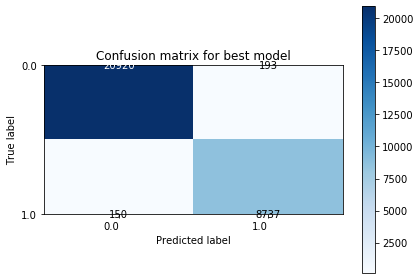

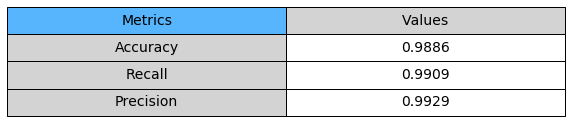

In [39]:
import graphviz
from sklearn import tree
d1_ex42_model = boost_dt(d1_train_x, d1_train_y, 50, 5, 10)
d1_ex42_tree = d1_ex42_model.estimators_[49,0]
cols = list(d1_train_x.columns)
dot_data = tree.export_graphviz(d1_ex42_tree,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset1_GB_BestModel_pruning",view=True)

plot_confusion_matrix(d1_test_y, d1_ex42_model.predict(d1_test_x), classes=set(d1_train_y))

**Audit Data**

In [40]:
min_num_samples = range(1,10)
num_of_boosts2 = 50

gb2_d2_train_acc = []
gb2_d2_test_acc = []
gb2_d2_train_err = []
gb2_d2_test_err = []

gb2_d2_train_acc_orig = []
gb2_d2_test_acc_orig = []
gb2_d2_train_err_orig = []
gb2_d2_test_err_orig = []

for m in min_num_samples:
    gb2_mod_orig = boost_dt(d2_train_x, d2_train_y, num_of_boosts2, 1, 3)
    gb2_d2_train_acc_orig.append(gb2_mod_orig.score(d2_train_x, d2_train_y))
    gb2_d2_test_acc_orig.append(gb2_mod_orig.score(d2_test_x, d2_test_y))  
    gb2_d2_train_err_orig.append(1-gb2_mod_orig.score(d2_train_x, d2_train_y))
    gb2_d2_test_err_orig.append(1-gb2_mod_orig.score(d2_test_x, d2_test_y))
    
    gb2_mod = boost_dt(d2_train_x, d2_train_y, num_of_boosts2, m, 3)
    gb2_d2_train_acc.append(gb2_mod.score(d2_train_x, d2_train_y))
    gb2_d2_test_acc.append(gb2_mod.score(d2_test_x, d2_test_y))   
    gb2_d2_train_err.append(1-gb2_mod.score(d2_train_x, d2_train_y))
    gb2_d2_test_err.append(1-gb2_mod.score(d2_test_x, d2_test_y))

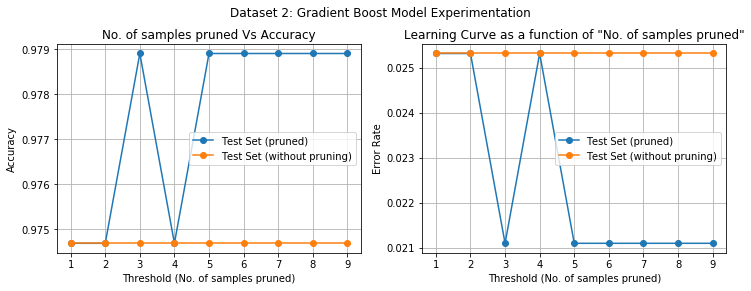

In [41]:
fig1_gb2, ax1_gb2 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

#ax1_gb2[0].plot(min_num_samples, gb2_d2_train_acc, label='Training Set (pruned)')
ax1_gb2[0].plot(min_num_samples, gb2_d2_test_acc, 'o-', label='Test Set (pruned)')
#ax1_gb2[0].plot(min_num_samples, gb2_d2_train_acc_orig, label='Training Set (without pruning)')
ax1_gb2[0].plot(min_num_samples, gb2_d2_test_acc_orig, 'o-', label='Test Set (without pruning)')
ax1_gb2[0].set(xlabel='Threshold (No. of samples pruned)', ylabel='Accuracy', title='No. of samples pruned Vs Accuracy')
ax1_gb2[0].grid()
ax1_gb2[0].legend(loc='best')

#ax1_gb2[1].plot(min_num_samples, gb2_d2_train_err, label='Training Set (pruned)')
ax1_gb2[1].plot(min_num_samples, gb2_d2_test_err, 'o-', label='Test Set (pruned)')
#ax1_gb2[1].plot(min_num_samples, gb2_d2_train_err_orig, label='Training Set (without pruning)')
ax1_gb2[1].plot(min_num_samples, gb2_d2_test_err_orig, 'o-', label='Test Set (without pruning)')
ax1_gb2[1].set(xlabel='Threshold (No. of samples pruned)', ylabel='Error Rate', title='Learning Curve as a function of "No. of samples pruned"')
ax1_gb2[1].grid()
ax1_gb2[1].legend(loc='best')

fig1_gb2.suptitle('Dataset 2: Gradient Boost Model Experimentation')
fig1_gb2.subplots_adjust(top=0.85)

(<matplotlib.axes._subplots.AxesSubplot at 0x272a2bf7a48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x272a274b988>)

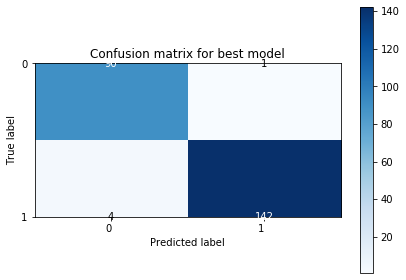

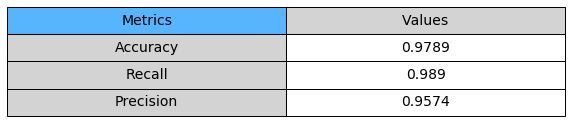

In [42]:
import graphviz
from sklearn import tree
d2_ex42_model = boost_dt(d2_train_x, d2_train_y, 50, 5, 3)
d2_ex42_tree = d2_ex42_model.estimators_[49,0]
cols = list(d2_train_x.columns)
dot_data = tree.export_graphviz(d2_ex42_tree,out_file=None,feature_names=cols,class_names=True)
graph = graphviz.Source(dot_data)
## Uncomment here
#graph.render("Dataset2_GB_BestModel_pruning",view=True)

plot_confusion_matrix(d2_test_y, d2_ex42_model.predict(d2_test_x), classes=set(d2_train_y))

**Implementation of cross validation**

In [46]:
# Cross Validation function
from sklearn.model_selection import cross_validate

def CV(model,x,Y,folds):
    cv_results = cross_validate(model,x,Y,cv=folds, return_train_score = True)
    return(cv_results)

**Dtataset1**

In [47]:
folds = 5
d1_svm = svm_model(svm_train_x, svm_train_y, 'poly', 1, 3, 'scale', toler)
d1_cv_svm = CV(d1_svm, svm_train_x, svm_train_y, folds)

d1_dt = DT(d1_train_x, d1_train_y, 16, 0)
d1_cv_dt = CV(d1_dt, d1_train_x, d1_train_y, folds)

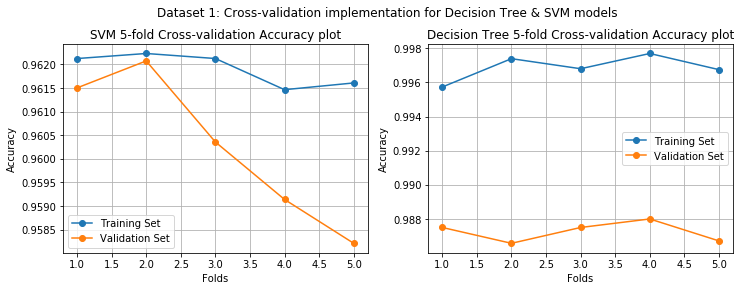

In [48]:
fig_cv1, ax_cv1 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
cv_x = range(1,6)

ax_cv1[0].plot(cv_x, d1_cv_svm['train_score'], 'o-',label='Training Set')
ax_cv1[0].plot(cv_x, d1_cv_svm['test_score'], 'o-', label='Validation Set')
ax_cv1[0].set(xlabel='Folds',ylabel='Accuracy',title='SVM 5-fold Cross-validation Accuracy plot')
ax_cv1[0].grid()
ax_cv1[0].legend(loc='best')

ax_cv1[1].plot(cv_x, d1_cv_dt['train_score'], 'o-', label='Training Set')
ax_cv1[1].plot(cv_x, d1_cv_dt['test_score'], 'o-', label='Validation Set')
ax_cv1[1].set(xlabel='Folds',ylabel='Accuracy',title='Decision Tree 5-fold Cross-validation Accuracy plot')
ax_cv1[1].grid()
ax_cv1[1].legend(loc='best')

fig_cv1.suptitle('Dataset 1: Cross-validation implementation for Decision Tree & SVM models')
fig_cv1.subplots_adjust(top=0.85)

**Dataset 2**

In [49]:
folds = 5
d2_svm = svm_model(x2_train, y2_train, 'poly', 1, 3, 'scale', toler)
d2_cv_svm = CV(d2_svm, x2_train, y2_train, folds)

d2_dt = DT(x2_train, y2_train, 16, 0)
d2_cv_dt = CV(d2_dt, x2_train, y2_train, folds)

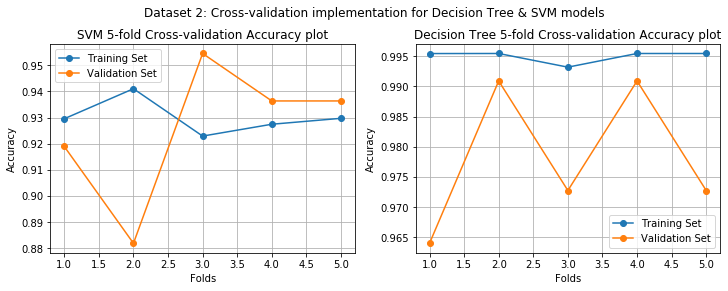

In [50]:
fig_cv1, ax_cv1 = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
cv_x = range(1,6)

ax_cv1[0].plot(cv_x, d2_cv_svm['train_score'], 'o-',label='Training Set')
ax_cv1[0].plot(cv_x, d2_cv_svm['test_score'], 'o-', label='Validation Set')
ax_cv1[0].set(xlabel='Folds',ylabel='Accuracy',title='SVM 5-fold Cross-validation Accuracy plot')
ax_cv1[0].grid()
ax_cv1[0].legend(loc='best')

ax_cv1[1].plot(cv_x, d2_cv_dt['train_score'], 'o-', label='Training Set')
ax_cv1[1].plot(cv_x, d2_cv_dt['test_score'], 'o-', label='Validation Set')
ax_cv1[1].set(xlabel='Folds',ylabel='Accuracy',title='Decision Tree 5-fold Cross-validation Accuracy plot')
ax_cv1[1].grid()
ax_cv1[1].legend(loc='best')

fig_cv1.suptitle('Dataset 2: Cross-validation implementation for Decision Tree & SVM models')
fig_cv1.subplots_adjust(top=0.85)